



__Описание полей__




>Date:        Дата 
---
>Visits:     Кол-во визитов на сайт в день
---
>Conversion: Кол-во конвертнувшихся в поле «Добавлен в корзину» в день
---
>Sales: Кол-во продаж в день


# Импорт библиотек


In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Загрузить данные из data.csv

In [2]:
df=pd.read_csv('data.csv',delimiter='\t')
df

,Date,Visits,Conversions,Sales
0,01-Apr-2020,1732.0,242,170
1,02-Apr-2020,1690.0,302,190
2,03-Apr-2020,1585.0,277,199
3,04-Apr-2020,1613.0,256,190
4,05-Apr-2020,1660.0,198,155
...,...,...,...,...
1131,07-Aug-2020,1042.0,276,216
1132,08-Aug-2020,939.0,278,211
1133,09-Aug-2020,860.0,233,190
1134,10-Aug-2020,911.0,273,210


# Вывести описательную статистику по полям


In [3]:
df.describe (include='all')

,Date,Visits,Conversions,Sales
count,1136,1136.000000,1136.000000,1136.000000
unique,347,NaN,NaN,NaN
top,01-Apr-2020,NaN,NaN,NaN
freq,4,NaN,NaN,NaN
mean,NaN,1207.187500,256.922535,174.939261
std,NaN,423.249078,46.458652,36.383043
min,NaN,527.000000,128.000000,43.000000
25%,NaN,915.000000,224.000000,152.000000
50%,NaN,1112.000000,252.000000,176.500000
75%,NaN,1402.500000,285.000000,199.000000


# Создать столбец год в датафрейме, заполнить значениями из Date , назвать его Y


In [4]:
df['Y']=pd.to_datetime(df['Date']).dt.year
df

,Date,Visits,Conversions,Sales,Y
0,01-Apr-2020,1732.0,242,170,2020
1,02-Apr-2020,1690.0,302,190,2020
2,03-Apr-2020,1585.0,277,199,2020
3,04-Apr-2020,1613.0,256,190,2020
4,05-Apr-2020,1660.0,198,155,2020
...,...,...,...,...,...
1131,07-Aug-2020,1042.0,276,216,2020
1132,08-Aug-2020,939.0,278,211,2020
1133,09-Aug-2020,860.0,233,190,2020
1134,10-Aug-2020,911.0,273,210,2020


# Посчитать долю продаж по отношению к визитам. округлить до второго знака, записать данные в столбец Conv_Sales

In [5]:
df['Conv_Sales']=(df['Sales']/df['Visits']).round(2)
df

,Date,Visits,Conversions,Sales,Y,Conv_Sales
0,01-Apr-2020,1732.0,242,170,2020,0.10
1,02-Apr-2020,1690.0,302,190,2020,0.11
2,03-Apr-2020,1585.0,277,199,2020,0.13
3,04-Apr-2020,1613.0,256,190,2020,0.12
4,05-Apr-2020,1660.0,198,155,2020,0.09
...,...,...,...,...,...,...
1131,07-Aug-2020,1042.0,276,216,2020,0.21
1132,08-Aug-2020,939.0,278,211,2020,0.22
1133,09-Aug-2020,860.0,233,190,2020,0.22
1134,10-Aug-2020,911.0,273,210,2020,0.23


# Убрать из датафрейма случаи, когда количество визитов больше 3200 или Доля продаж по отношению к визитам меньше 0,05 

In [6]:
df=df[(df.Visits<=3200)&(df.Conv_Sales>=0.05)]
df

,Date,Visits,Conversions,Sales,Y,Conv_Sales
0,01-Apr-2020,1732.0,242,170,2020,0.10
1,02-Apr-2020,1690.0,302,190,2020,0.11
2,03-Apr-2020,1585.0,277,199,2020,0.13
3,04-Apr-2020,1613.0,256,190,2020,0.12
4,05-Apr-2020,1660.0,198,155,2020,0.09
...,...,...,...,...,...,...
1131,07-Aug-2020,1042.0,276,216,2020,0.21
1132,08-Aug-2020,939.0,278,211,2020,0.22
1133,09-Aug-2020,860.0,233,190,2020,0.22
1134,10-Aug-2020,911.0,273,210,2020,0.23


# Каждый 7, 17 и 27 день месяца мы проводим акции, Создайте новый столбец Flag_Act, в котором 1- это месяц акции, 0 - нет

In [7]:
df['Flag_Act']=[1 if (a==7)|(a==17)|(a==27) else 0 for a in pd.to_datetime(df['Date']).dt.day]
df

C:\Users\Alexey\AppData\Local\Temp\ipykernel_16148\2415206182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Flag_Act']=[1 if (a==7)|(a==17)|(a==27) else 0 for a in pd.to_datetime(df['Date']).dt.day]


,Date,Visits,Conversions,Sales,Y,Conv_Sales,Flag_Act
0,01-Apr-2020,1732.0,242,170,2020,0.10,0
1,02-Apr-2020,1690.0,302,190,2020,0.11,0
2,03-Apr-2020,1585.0,277,199,2020,0.13,0
3,04-Apr-2020,1613.0,256,190,2020,0.12,0
4,05-Apr-2020,1660.0,198,155,2020,0.09,0
...,...,...,...,...,...,...,...
1131,07-Aug-2020,1042.0,276,216,2020,0.21,1
1132,08-Aug-2020,939.0,278,211,2020,0.22,0
1133,09-Aug-2020,860.0,233,190,2020,0.22,0
1134,10-Aug-2020,911.0,273,210,2020,0.23,0


# Сгруппировать датафрейм по столбцам Y и Flag_Act, и вывести среднюю Долю продаж по отношению к визитам. Назвать столбец "Avg_Conv_Sales". Датафрейм назвать df_agg


In [8]:
df_agg=df.copy()
df_agg

,Date,Visits,Conversions,Sales,Y,Conv_Sales,Flag_Act
0,01-Apr-2020,1732.0,242,170,2020,0.10,0
1,02-Apr-2020,1690.0,302,190,2020,0.11,0
2,03-Apr-2020,1585.0,277,199,2020,0.13,0
3,04-Apr-2020,1613.0,256,190,2020,0.12,0
4,05-Apr-2020,1660.0,198,155,2020,0.09,0
...,...,...,...,...,...,...,...
1131,07-Aug-2020,1042.0,276,216,2020,0.21,1
1132,08-Aug-2020,939.0,278,211,2020,0.22,0
1133,09-Aug-2020,860.0,233,190,2020,0.22,0
1134,10-Aug-2020,911.0,273,210,2020,0.23,0


In [9]:
df_agg=df.groupby(['Y', 'Flag_Act']).agg({'Conv_Sales': ['mean']}). reset_index()

In [10]:
df_agg.columns = ['Date','Visits','Avg_Conv_Sales']
df_agg

,Date,Visits,Avg_Conv_Sales
0,2019,0,0.100881
1,2019,1,0.106061
2,2020,0,0.187479
3,2020,1,0.181519


# !Пришла информация о том, что появились обновленные данные по продажам (data_corr.csv): новые данные содержат как новые даты, так и корректировки к старому датафрейму. 
# Вам необходимо добавить новые данные к старому датафрейму: 
>## 1)Если даты уже были в старом датафрейме, то заменить базовые данные(Visits,Conversions,Sales) на данные из файла data_corr. 
>## 2)Если таких дат не было, то заполнить их данными из файла data_corr. 
>## 3)Информацию по тем датам, которых нет в data_corr, оставить без изменений (как в старом датафрейме)
# К новосформированному датафрейму применить все те же условия и группировки, что и для старого датафрейма (Ограничения на количество визитов, долю продаж, акционные дни и тп)

In [11]:
df=pd.read_csv('data.csv',delimiter='\t')
df_corr=pd.read_csv('data_corr.csv',delimiter='\t')
df = df[:].set_index('Date')
df.update(df_corr.set_index('Date'))
df.reset_index(inplace=True)
df3=pd.concat([df, df_corr])
df3 = df3.drop_duplicates(subset=['Date'])
df3.reset_index(inplace=True)
df3.drop('index', axis= 1 , inplace= True )
#df3 = df3.sort_values(by='Date')
#df3.iloc[340:366]
df3['Conv_Sales']=(df3['Sales']/df3['Visits']).round(2)
df3=df3[(df3.Visits<=3200)&(df3.Conv_Sales>=0.05)]
df3['Flag_Act']=[1 if (a==7)|(a==17)|(a==27) else 0 for a in pd.to_datetime(df3['Date']).dt.day]
df3.iloc[0:20]

C:\Users\Alexey\AppData\Local\Temp\ipykernel_16148\346631147.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.update(df_corr.set_index('Date'))


,Date,Visits,Conversions,Sales,Conv_Sales,Flag_Act
0,01-Apr-2020,1732.0,242.0,170.0,0.10,0
1,02-Apr-2020,1690.0,302.0,190.0,0.11,0
2,03-Apr-2020,1585.0,277.0,199.0,0.13,0
3,04-Apr-2020,1613.0,256.0,190.0,0.12,0
4,05-Apr-2020,1660.0,198.0,155.0,0.09,0
5,06-Apr-2020,1795.0,257.0,180.0,0.10,0
6,07-Apr-2020,1590.0,341.0,179.0,0.11,1
7,08-Apr-2020,1513.0,249.0,164.0,0.11,0
8,09-Apr-2020,1225.0,241.0,170.0,0.14,0
9,10-Apr-2020,1145.0,295.0,212.0,0.19,0


# Получите аггрегацию по столбцам Y и Flag_Act в новом датафрейме. Выведите среднюю Долю продаж по отношению к визитам в новом датафрейме.  

# Покажите абсолютное изменение этого показателя в старом датафрейме(до корректировки) с новым датафреймом(после корректировки). Округлите его до четвертого знака после запятой

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (17,5)

In [13]:
df3_agg=df3.copy()
df3_agg['Y']=pd.to_datetime(df3_agg['Date']).dt.year
df3_agg=df3_agg.groupby(['Y', 'Flag_Act']).agg({'Conv_Sales': ['mean']}). reset_index()
df3_agg.columns = ['Date','Visits','Avg_Conv_Sales']
dif_agg=df3_agg.copy()
dif_agg['Avg_Conv_Sales'] = np.where(dif_agg['Avg_Conv_Sales'] == df_agg['Avg_Conv_Sales'], 0, dif_agg['Avg_Conv_Sales'] - df_agg['Avg_Conv_Sales'])
dif_agg['Avg_Conv_Sales'].round(4)

0   -0.0020
1   -0.0019
2   -0.0121
3   -0.0079
Name: Avg_Conv_Sales, dtype: float64

# Визуализируйте данные и/или изменение старого и нового датафрейма любым способом, который посчитаете информативным

In [19]:
def visual_data(path_to_read_df):
    """Функция визуализации датафреймов определенного формата"""
    df = pd.read_csv(path_to_read_df, delimiter='\t')  # Чтение ДФ
    df.set_index('Date', inplace=True)
    df.index = pd.to_datetime(df.index)  # Индекс строковый в дейттайм
    df = df.sort_index()  # Сортируем индекс
    df = df[~df.index.duplicated(keep='first')]  # Удаляем дубликаты индекса
    # Посмотрим на распределение велечин
    df.hist()
    # Взглянем на корреляцию фичей
    print(df.corr())
    # Построим графики на временной шкале, чтобы попытаться выделить тренд, сезонность и пр.
    # Отразим скользящие средние величин
    for col in df.columns:
        ma_period = 30  # период скользящей средней в днях
        plt.figure()
        plt.title(col)
        df[col].plot(grid=True, label=f'Value', linewidth=1.5)
        # Аппроксимируем средним 30-ти дневным скользямим окном
        df[col].rolling(window=f'{ma_period} d').mean().plot(grid=True, label=f'MA_{ma_period}d', linewidth=3) 
        plt.legend(loc='best')

               Visits  Conversions     Sales
Visits       1.000000     0.047593 -0.202880
Conversions  0.047593     1.000000  0.628238
Sales       -0.202880     0.628238  1.000000


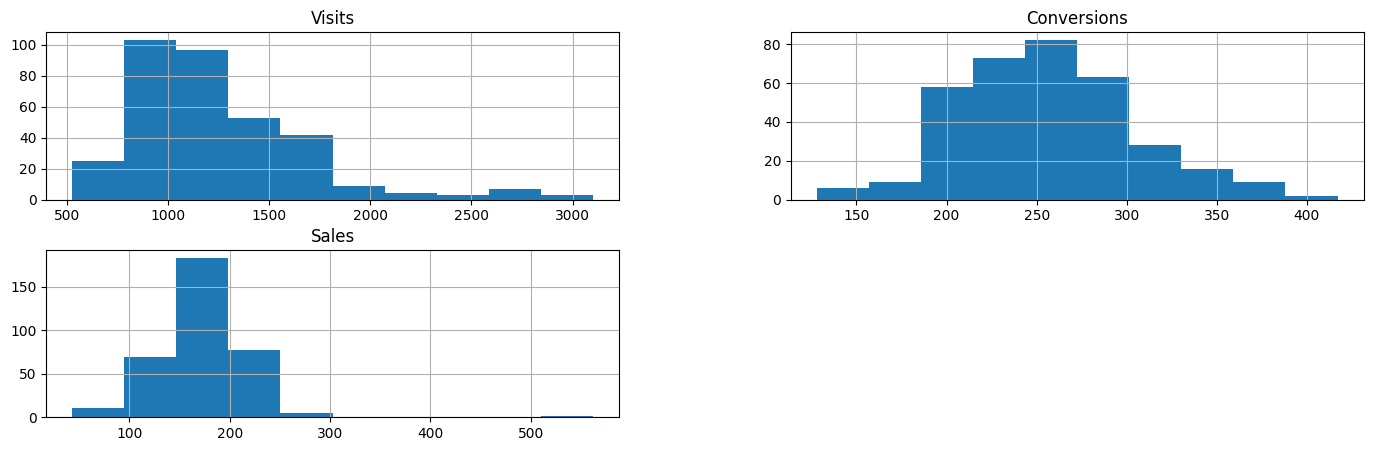

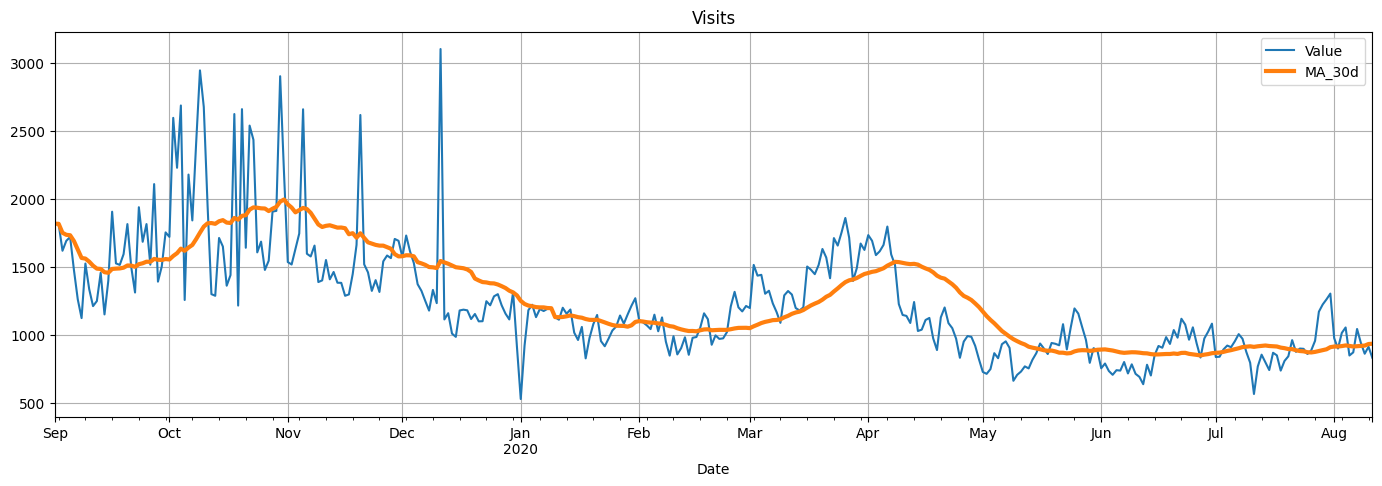

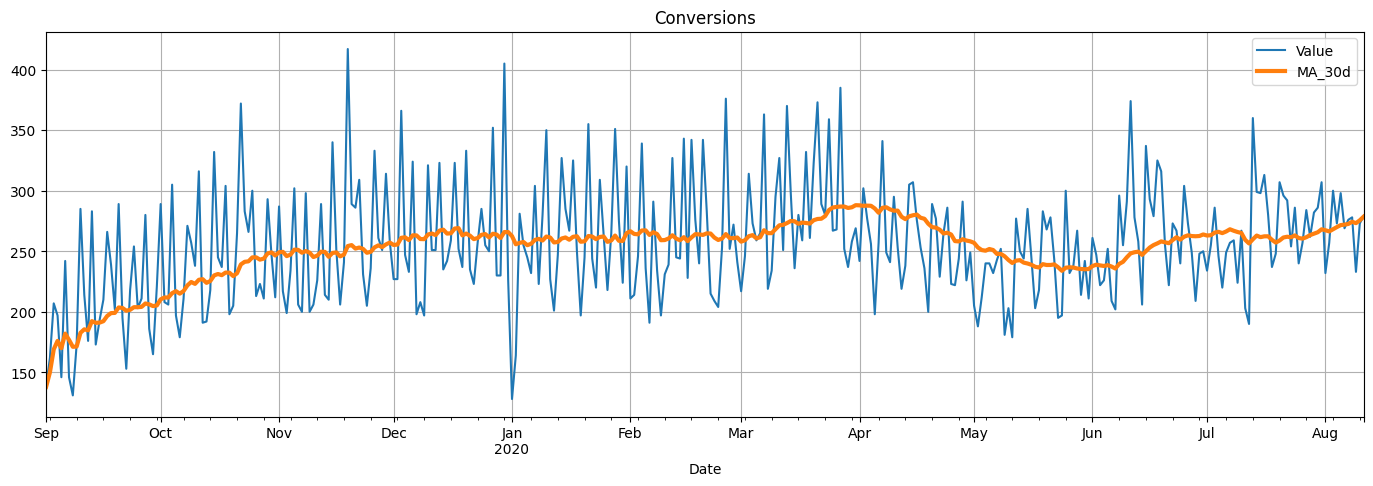

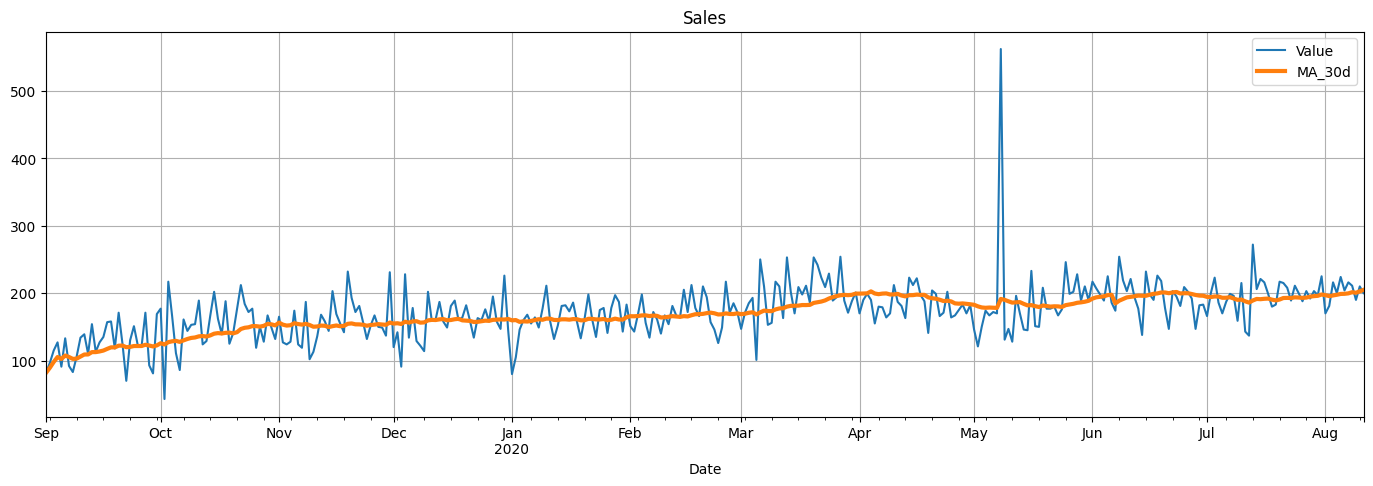

In [20]:
visual_data('data.csv')

***Из полученных графиков можно сделать вывод, что продажи имеют ярко выраженный восходящий тренд. Интересно заметить, что посещение при это имеют тенденцию к снижению***

***Sales имеют довольно существенную положительную линейную зависимость к Conversions, что, впринципе, неудивительно. При этом Visits имеют слабую, но тем не менее отрицательную зависомость от Sales, что довольно интересно***

***Очень интересен резкий скачок в продажах в мае. Возможно это выброс, необходимо проверить***

In [16]:
df_old=pd.read_csv('data.csv',delimiter='\t')

In [17]:
df_old[df_old['Sales']>300]

,Date,Visits,Conversions,Sales
381,08-May-2020,903.0,252,562


In [18]:
df_old.loc['2020-05-06':'2020-05-10']

,Date,Visits,Conversions,Sales


***Возможно, к празднику были какие-то большие закупки. Можно косвенно попробовать порассуждать о сцепифике товаров сайта..***